DATA PREPROCESSING

In [47]:
#   Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
# loading data
df = pd.read_csv('disney_plus_titles (2).csv')

In [58]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [59]:
df.shape

(1368, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


Data Transforming

In [61]:
#Creating new coloumns from existing column
df[['g1','g2','g3']] = df['listed_in'].str.split(',', expand = True)

Data Reduction

In [62]:
# Removing unnecessary coloums
df.drop(['show_id','description','listed_in'],axis=1,inplace=True)

Data Cleaning

In [63]:
# checking for null values
df.isnull().sum()

,0
type,0
title,0
director,440
cast,174
country,175
date_added,3
release_year,0
rating,2
duration,0
g1,0


In [64]:
# filling null values
df['director']= df['director'].fillna('without director refrence')
df['director'].isnull().sum()

0

In [65]:
df['cast']= df['cast'].fillna('without cast refrence')
df['cast'].isnull().sum()

0

In [66]:
df['country']= df['country'].fillna('without country refrence')
df['country'].isnull().sum()

0

In [67]:
df['rating']= df['rating'].fillna('without rating refrence')
df['rating'].isnull().sum()

0

In [68]:
#filling null values
df.fillna(0,inplace=True)
df.isnull().sum()

,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0
g1,0


In [69]:
# checking for duplicated values
df.duplicated().sum()

0

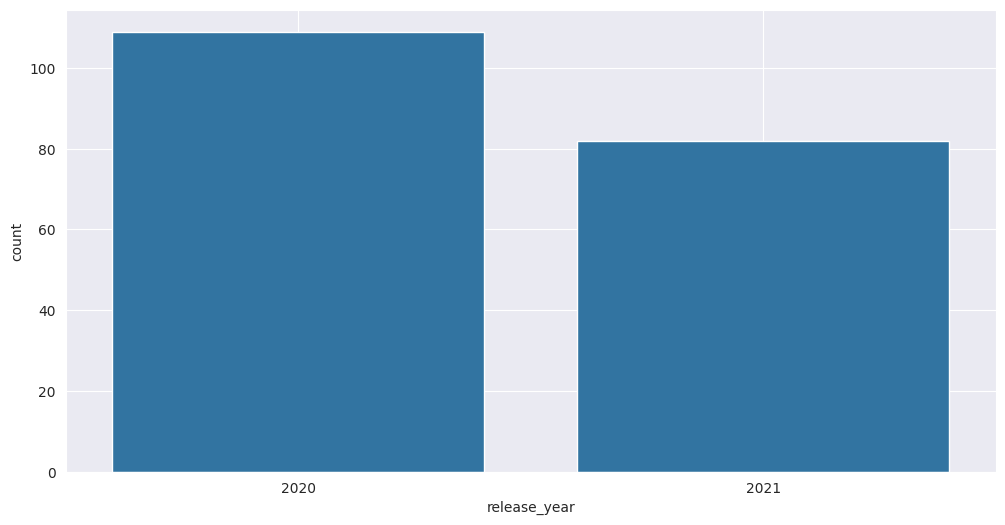

In [72]:
ans1 = df.query("release_year >= 2020")
plt.figure(figsize=(12,6))
sns.set_style('dark')
sns.countplot(ans1, x = 'release_year')
plt.grid(True)
plt.show()

2. Show the difference in Movies realeased and Shows released of top 3 year of 20s having the most released.

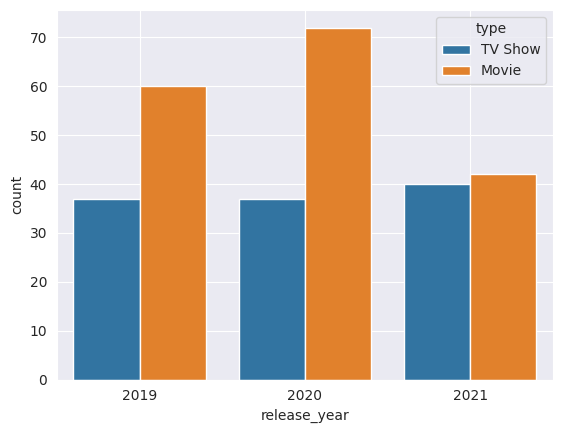

In [73]:
ans2 = df.query('release_year ==[2020,2021,2019]')
sns.countplot(ans2, x = 'release_year', hue = 'type')
plt.grid(True)
plt.show()

3. What are total number of movies and tv shows released?

In [74]:
ans3 = df['type'].value_counts()
ans3

,count
type,
Movie,991
TV Show,377


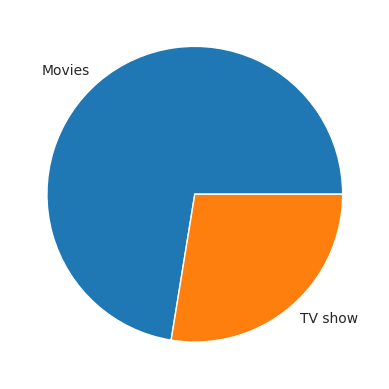

In [75]:
plt.pie(ans3, labels = ['Movies','TV show'])
plt.show()

4. Which year of 20s has released the most Action-Adventure show?

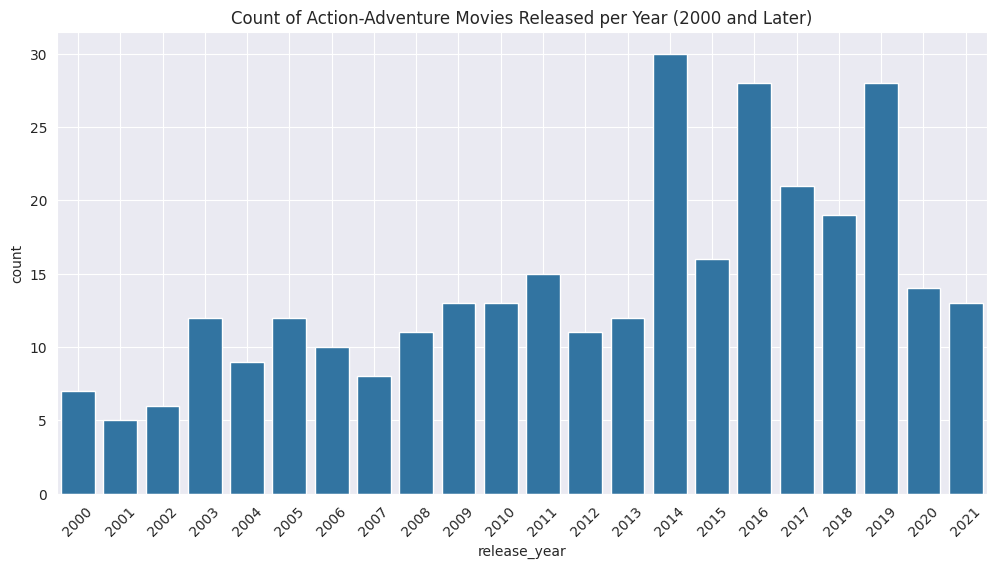

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correct the query logic using parentheses to ensure the proper condition grouping
acad = df.query("(release_year >= 2000) and (g1 == 'Action-Adventure' or g2 == 'Action-Adventure' or g3 == 'Action-Adventure')")

# Create the countplot for the 'release_year' column
plt.figure(figsize=(12, 6))
sns.countplot(data=acad, x='release_year')
plt.grid(True)
plt.title('Count of Action-Adventure Movies Released per Year (2000 and Later)')
plt.xticks(rotation=45)  # Rotate x-axis labels if they are crowded
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

5. Which category of rating has the most number of release?

In [79]:
ans5 = df['rating'].value_counts()
ans5

,count
rating,
TV-G,307
TV-PG,275
G,235
PG,227
TV-Y7,130
TV-14,72
PG-13,60
TV-Y,48
TV-Y7-FV,12


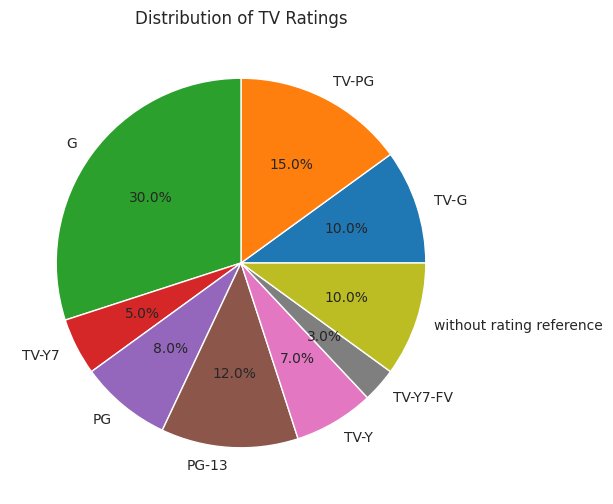

In [84]:
import matplotlib.pyplot as plt

# Make sure 'ans5' contains numerical data for the pie chart.
ans5 = [10, 15, 30, 5, 8, 12, 7, 3, 10]  # Example data, replace with your actual values

plt.figure(figsize=(6, 6))
plt.pie(ans5, labels=['TV-G', 'TV-PG', 'G', 'TV-Y7', 'PG', 'PG-13', 'TV-Y', 'TV-Y7-FV', 'without rating reference'], autopct='%1.1f%%')
plt.title("Distribution of TV Ratings")
plt.show()
